# Introduction

This research examines the relationship between instructors' reported frequencies on focus on developing mathmatical and conceptual models and their reported frequency of using computer-interfacing measurement devices, using course information survey responses that accompany the E-CLASS student data. Understanding this relationship may be able to inform what purposes instructors believe are best suited for using these technologies. Since these are general ratings for the course for the entirety of the semester, it is likely that the granularity is not fine enough to adequately answer this question based on this data alone, but we'll take a look anyways.

## Overarching Question: How do the reported uses of real-time data visualization devices in physics labs relate to the development of models?

The central question is to examine the ways the computer-interfacing measurement devices are used in introductory college physics laboratories, and how they are connected to changes in students' epistemological beliefs and attitudes towards experimentation / laboratory. Computer-interfacing measurement devices are commonly used for collection and visualization of real-time physical data. Most physics instructors accept that these experiences can facilitate the development of both mathematical and conceptual models. However, there have not been many studies which explore the learning processes underlying these assumptions, and learning experiences from the use of these devices in laboratory settings are not well-understood. 

Additionally, a growing body of research has shown that the roles that learners adopt in physics laboratory learning settings are inequitably distributed by gender, with women undertaking more secretarial and management roles and men undertaking more tinkering and experimenting roles. Although how gender may be connected to learners' experiences using computer-interfacing measurment devices is not well documented, it is possible that similar dynamics plague the use of these technologies, and consequently impact how much learners benefit.

# Data

In [6]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
### 💻 FILL IN YOUR DATASET FILE NAME BELOW 💻 ###

file_name = "ECLASS_anon_cis.csv"
dataset_path = data/ECLASS_anon_cis.csv
#dataset_path = "data/" + file_name

df = pd.read_csv(data/ECLASS_anon_cis.csv)

In [8]:
df.head()

Q5   Q52  Q53                            Q18             Q27  \
0  semester  Fall  NaN  First year (introductory) lab  Calculus-based   
1  semester  Fall  NaN  First year (introductory) lab  Calculus-based   
2  semester  Fall  NaN      Beyond the first year lab             NaN   
3  semester  Fall  NaN  First year (introductory) lab  Calculus-based   
4  semester  Fall  NaN  First year (introductory) lab  Calculus-based   

          Q6                                         Q11  Q19  Q20  \
0   9/9/2016                                No incentive   55    3   
1   9/3/2016  Credit for completion (like an assignment)  600   37   
2  8/22/2016  Credit for completion (like an assignment)   23    1   
3  9/14/2016  Credit for completion (like an assignment)   25    2   
4   9/9/2016                                No incentive   40    3   

                        Q15  ...      Q38_4   Q41   Q42   Q43  \
0            4 year college  ...      Never  11.0  11.0   0.0   
1  PhD granting institution  ...      Never   6.0  12.0   0.0   
2  PhD granting institution  ...     Always   1.0   3.0   3.0   
3            4 year college  ...  Sometimes   7.0   3.0  10.0   
4            4 year college  ...      Never  11.0  11.0   0.0   

          StartDate anon_instructor_id anon_university_id         ResponseId  \
0  29/07/2016 09:35                  0                  0  R_9TQGuSY5m31uCgp   
1  30/07/2016 15:16                  1                  1  R_WcbonOUwNhq1aTv   
2  14/08/2016 20:45                  2                  2  R_6QckmxZUXlkQ5z3   
3  15/08/2016 08:32                  3                  3  R_31hCg7myirwz5YQ   
4  16/08/2016 10:39                  0                  0  R_2uUuv0cqKVTrZPd   

     pre_survey_id   post_survey_id  
0  eb70O8rWoi7TeEl  bdrBNZhS5ctkrtj  
1  enXrvYRTHSwaJiR  3I6hLxNFWEUu5Ex  
2  bK2V8FlTDsDGtJX  bpVIjAwWGMGtekJ  
3  bJlVpGxcYoFnxWd  3vDaZhGQglbcdiR  
4  8elF9Rxw2rrXOvP  7Vetb0Z6aGRzirH  

[5 rows x 49 columns]

## Data Cleaning

In [10]:
#new dataframe with columns of interest
df_reg_ana = df[['Q18', 'Q36_1', 'Q36_2', 'Q37_4']]
df_reg_ana.head()

Q18      Q36_1   Q36_2      Q37_4
0  First year (introductory) lab     Rarely  Rarely     Always
1  First year (introductory) lab     Rarely  Rarely      Never
2      Beyond the first year lab      Often   Often      Often
3  First year (introductory) lab  Sometimes   Often  Sometimes
4  First year (introductory) lab  Sometimes  Rarely      Often

In [11]:
#recode to numerical
df_reg_ana['Q36_1'] = df_reg_ana['Q36_1'].replace({'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5})
df_reg_ana['Q36_2'] = df_reg_ana['Q36_2'].replace({'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5})
df_reg_ana['Q37_4'] = df_reg_ana['Q37_4'].replace({'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5})
df_reg_ana.head()

C:\Users\stacy\AppData\Local\Temp\ipykernel_33472\2660362453.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reg_ana['Q36_1'] = df_reg_ana['Q36_1'].replace({'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5})
C:\Users\stacy\AppData\Local\Temp\ipykernel_33472\2660362453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_ana['Q36_1'] = df_reg_ana['Q36_1'].replace({'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5})
C:\Users\stacy\AppData\Local\Temp\ipykernel_33472\2660362453.p

Q18  Q36_1  Q36_2  Q37_4
0  First year (introductory) lab    2.0    2.0    5.0
1  First year (introductory) lab    2.0    2.0    1.0
2      Beyond the first year lab    4.0    4.0    4.0
3  First year (introductory) lab    3.0    4.0    3.0
4  First year (introductory) lab    3.0    2.0    4.0

In [12]:
#rename columns
df_reg_ana = df_reg_ana.rename(columns={'Q18': 'level', 'Q36_1': 'math_models_freq', 'Q36_2': 'conc_models_freq', 'Q37_4': 'comp_int_freq'})
df_reg_ana.head()

level  math_models_freq  conc_models_freq  \
0  First year (introductory) lab               2.0               2.0   
1  First year (introductory) lab               2.0               2.0   
2      Beyond the first year lab               4.0               4.0   
3  First year (introductory) lab               3.0               4.0   
4  First year (introductory) lab               3.0               2.0   

   comp_int_freq  
0            5.0  
1            1.0  
2            4.0  
3            3.0  
4            4.0

In [13]:
#recode level (1 = first year, 0 = beyond first year), calc_or_alg (1 = alg, 0 = calc), inst_type (1 = 2y, 2 = 4y, 3 = PhD granting)
df_reg_ana['level'] = df_reg_ana['level'].replace({'First year (introductory) lab': 1, 'Beyond the first year lab': 0})
df_reg_ana.head()

C:\Users\stacy\AppData\Local\Temp\ipykernel_33472\4007376843.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reg_ana['level'] = df_reg_ana['level'].replace({'First year (introductory) lab': 1, 'Beyond the first year lab': 0})


level  math_models_freq  conc_models_freq  comp_int_freq
0      1               2.0               2.0            5.0
1      1               2.0               2.0            1.0
2      0               4.0               4.0            4.0
3      1               3.0               4.0            3.0
4      1               3.0               2.0            4.0

In [14]:
df_reg_ana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level             494 non-null    int64  
 1   math_models_freq  220 non-null    float64
 2   conc_models_freq  220 non-null    float64
 3   comp_int_freq     220 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.6 KB


In [15]:
#drop missing values
df_reg_ana.dropna(inplace=True)
df_reg_ana.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 493
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level             220 non-null    int64  
 1   math_models_freq  220 non-null    float64
 2   conc_models_freq  220 non-null    float64
 3   comp_int_freq     220 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 8.6 KB


In [16]:
#drop non-introductory lab courses
df_reg_ana = df_reg_ana[df_reg_ana['level'] != 1]
df_reg_ana.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 2 to 483
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level             93 non-null     int64  
 1   math_models_freq  93 non-null     float64
 2   conc_models_freq  93 non-null     float64
 3   comp_int_freq     93 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.6 KB


**Data Overview**

The Lewandoski Lab at the University of Colorado Boulder developed and validated the Colorado Learning Attitudes about Science Survey for Experimental Physics (E-CLASS) data collection instrument, and made the dataset publicly accessible and available for additional research use (https://github.com/Lewandowski-Labs-PER/eclass-public/tree/master). This is a well-established Physics Education Research (and Experimental Cold Molecular Physics) lab at an R1 university that has published many studies concerning this and other datasets (https://jila.colorado.edu/lewandowski/publications/scientific/year).

The course information survey of the E-CLASS contains 494 responses (rows) from instructors (pre-cleaning), for each class they administered the E-CLASS survey to. Columns which will be important to me are Q18 (level of the course), Q36_1 (Modeling - Develop mathematical models for the system being studied), Q36_2 (Modeling - Develop conceptual models for the system being studied), and Q37_4 (Data analysis and visualization - Use computers to interface with measurement devices).

## Data Distributions

In [19]:
fischer_kurtosis = df_reg_ana.kurtosis()
print(fischer_kurtosis)

level               0.000000
math_models_freq   -0.025612
conc_models_freq    0.019958
comp_int_freq       0.416858
dtype: float64


In [20]:
skewness = df_reg_ana.skew()
print(skewness)

level               0.000000
math_models_freq   -0.202256
conc_models_freq   -0.407829
comp_int_freq      -0.648785
dtype: float64


<Axes: >

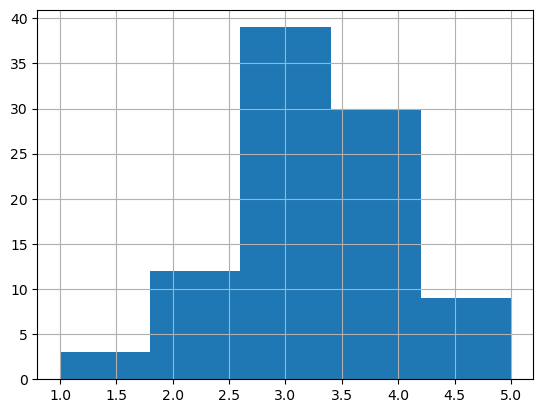

In [21]:
df_reg_ana['math_models_freq'].hist(bins=5)

<Axes: >

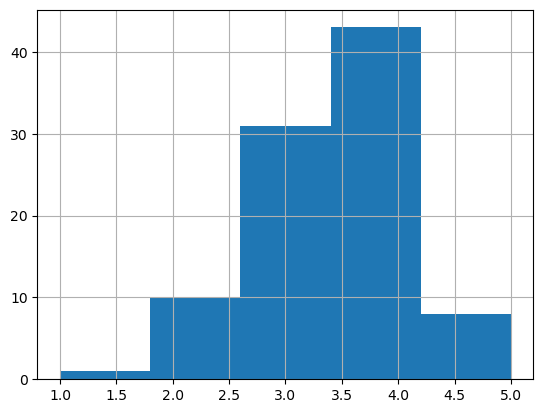

In [22]:
df_reg_ana['conc_models_freq'].hist(bins=5)

<Axes: >

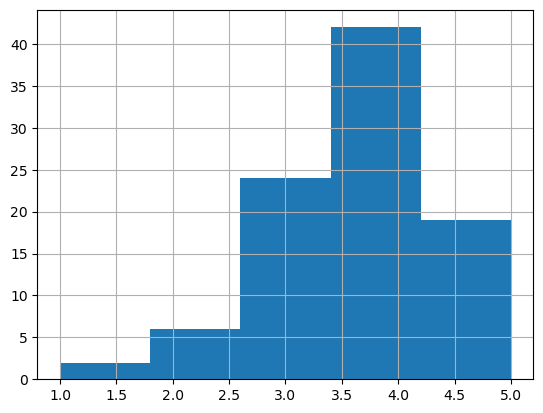

In [23]:
df_reg_ana['comp_int_freq'].hist(bins=5)

# Methods and Results

In [25]:
#Import any helper files you need here
import scipy as sp
import statsmodels.miscmodels.ordinal_model as om
import seaborn as sns

## First Research Question: Is there a significant relationship between the instructor's rating of mathematical focus frequency in introductory physics labs and the reported frequency of use of computer to interface with measurement devices?

### Methods

I will perform an ordinal regression to model this data (using the Statsmodels library), since the numerical values are derived from a Likert scale, and each point on the scale is ordered but the differences between each of the points are not necessarily equal. The distribution of math_models_freq was approximately normal for (based on -1.0 < kurtosis < 1.0 and -0.5 < skewness < 0.5). The distribution of comp_int_freq is slightly left-skewed, so logit transformation will be used. I will present the answer in a scatterplot (using the Seaborn library) and with ordinal regression statistics.

I will use math_models_freq and comp_int_freq, which are the instructor-reported frequencies of how often students develop mathematical models for the system being studied and use computers to interface with measurement devices.
)

I cleaned the data by first creating a new dataframe, df_reg_ana, containing just the variables of interest, renaming the columns with more descriptive names, recoding the Likert-scale for the reported frequencies (Never, Rarely, Sometimes, Often, Always) to a 5-point numerical scale (1, 2, 3, 4, 5). Then I dropped missing values and kept only the rows for introductory lab coursive

### Results 

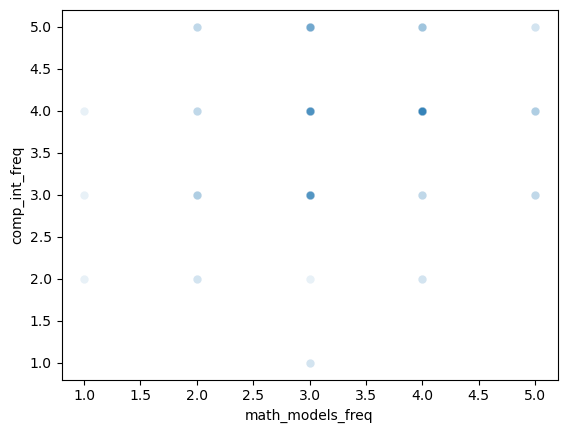

In [30]:
x = df_reg_ana['math_models_freq']
y = df_reg_ana['comp_int_freq']
sns.scatterplot(x=x, y=y, alpha=0.1)
plt.show()

In [31]:
#ordinal regression analysis for math_models_freq and comp_int_freq
X = df_reg_ana["math_models_freq"]
y = df_reg_ana["comp_int_freq"]
model = om.OrderedModel(y, X, dist="logit")
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 1.278472
         Iterations: 199
         Function evaluations: 323


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          comp_int_freq   Log-Likelihood:                -118.90
Model:                   OrderedModel   AIC:                             247.8
Method:            Maximum Likelihood   BIC:                             260.5
Date:                Sat, 07 Dec 2024                                         
Time:                        16:34:52                                         
No. Observations:                  93                                         
Df Residuals:                      88                                         
Df Model:                           1                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
math_models_freq     0.1932      0.120      1.608      0.108      -0.042       0.429
1.0/2.0             -1.4304      0.472     -3.034      0.002      -2.355      -0.506
2.0/3.0             -0.3945      0.393     -1.005      0.315      -1.164       0.375
3.0/4.0             -0.0038      0.183     -0.021      0.984      -0.363       0.356
4.0/5.0              0.2176      0.129      1.685      0.092      -0.036       0.471
====================================================================================
"""

The coefficient indicates a 0.1932 unit increase in comp_int_freq for a one unit increase in math_models_freq. The P>|z| values indicate the probability of observing a coefficient as extreme as the calculated coefficient, with the threshhold for significance at alpha. Based on alpha of 0.05, the observed relationship is not statistically significant (P>|z| = 0.108).

## Second Research Question: Is there a significant relationship between the instructor's rating of conceptual focus frequency in introductory physics labs and the reported frequency of use of computer to interface with measurement devices?

### Methods

I will perform an ordinal regression to model this data (using the Statsmodels library), since the numerical values are derived from a Likert scale, and each point on the scale is ordered but the differences between each of the points are not necessarily equal. The distribution of conc_models_freq was approximately normal for (based on -1.0 < kurtosis < 1.0 and -0.5 < skewness < 0.5). The distribution of comp_int_freq is slightly left-skewed, so logit transformation will be used. I will present the answer in a scatterplot (using the Seaborn library) and with ordinal regression statistics.

I will use conc_models_freq and comp_int_freq, which are the instructor-reported frequencies of how often students develop conceptual models for the system being studied and use computers to interface with measurement devices.

I cleaned the data by first creating a new dataframe, df_reg_ana, containing just the variables of interest, renaming the columns with more descriptive names, recoding the Likert-scale for the reported frequencies (Never, Rarely, Sometimes, Often, Always) to a 5-point numerical scale (1, 2, 3, 4, 5). Then I dropped missing values and kept only the rows for introductory lab courses.

### Results 

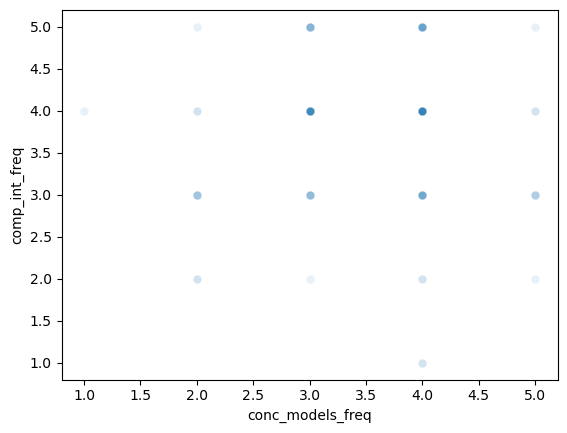

In [37]:
x = df_reg_ana['conc_models_freq']
y = df_reg_ana['comp_int_freq']
sns.scatterplot(x=x, y=y, alpha=0.1)
plt.show()

In [38]:
#ordinal regression analysis for conc_models_freq and comp_int_freq
X = df_reg_ana["conc_models_freq"]
y = df_reg_ana["comp_int_freq"]
model = om.OrderedModel(y, X, dist="logit")
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 1.292302
         Iterations: 147
         Function evaluations: 243


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          comp_int_freq   Log-Likelihood:                -120.18
Model:                   OrderedModel   AIC:                             250.4
Method:            Maximum Likelihood   BIC:                             263.0
Date:                Sat, 07 Dec 2024                                         
Time:                        16:34:53                                         
No. Observations:                  93                                         
Df Residuals:                      88                                         
Df Model:                           1                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
conc_models_freq     0.0195      0.131      0.149      0.882      -0.237       0.276
1.0/2.0             -1.9548      0.547     -3.577      0.000      -3.026      -0.884
2.0/3.0             -0.4198      0.395     -1.064      0.287      -1.193       0.353
3.0/4.0             -0.0362      0.183     -0.198      0.843      -0.395       0.323
4.0/5.0              0.2055      0.129      1.590      0.112      -0.048       0.459
====================================================================================
"""

The coefficient indicates a 0.0195 unit increase in comp_int_freq for a one unit increase in conc_models_freq. The P>|z| values indicate the probability of observing a coefficient as extreme as the calculated coefficient, with the threshhold for significance at alpha. Based on alpha of 0.05, the observed relationship is not statistically significant (P>|z| = 0.882).

# Discussion

## Considerations

These results indicate that instructor rated frequency of developing neither mathematical nor conceptual models in lab are strong or significant predictors of their use of computers to interface with data collection devices. The research question is probably better answered through interviews (qualitative) or observation or document analysis of laboratory manuals (qualitative or quantitative).

The dataset has some limitations, including the construction and validation of the course information survey, which was not validated as part of the student survey for E-CLASS. While some of the items are objective, such as the level and math-basis of the course, the Likert scale used to assess frequency of laboratory instructional choices should have been validated. After cleaning the dataset and omitting rows with missing values, there were only 93 entries included in the analysis.

Self-selection bias is a flaw of this data, as the survey was administered to classes based on the instructor choosing to do so.

## Summary

I think the results made sense, based on the way the data was collected. I hadn't used this statistical model before (so my execution could also be flawed), and previously I've mainly used linear regression for analysis of interval or continuous data. However, although sometimes linear regression is used for Likert scale data (as many commercial statistical softwares do not have ordinal regression capabilities), it seemed like a better choice to use the ordinal regression model. 

Generally, I'm not a huge fan of Likert scale surveys. I would probably not use one in my own research. However, I think it was a good experience to look at this dataset more deeply and do some analysis with it. I'm looking the other side of the data (the student responses to the epistemological items) in another class, and that has been validated so maybe there will be something there.